In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.4 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.5 MB/s eta 0:00:00


In [ ]:
pip install matplotlib

In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=466a7e7fda93bf8be872d5ab7e77273c7308fb30f9530399aa225bb265b198c8
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


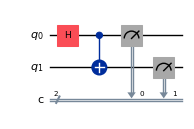

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

# Criando um registrador quântico com 2 qubits
q = QuantumRegister(2, 'q')
# Criando registradores clássicos para medições
c = ClassicalRegister(2, 'c')

# Criando o circuito quântico
bell_circuit = QuantumCircuit(q, c)

# Aplicando Hadamard no primeiro qubit
bell_circuit.h(q[0])
# Aplicando CNOT com o primeiro qubit como controle e o segundo como alvo
bell_circuit.cx(q[0], q[1])

# Medindo os qubits
bell_circuit.measure(q, c)

# Configurando o simulador
simulator = AerSimulator()

# Exibir o circuito
bell_circuit.draw(output='mpl', scale=0.5)

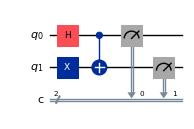

In [ ]:

# Criando o circuito quântico
bell_circuit = QuantumCircuit(q, c)

# Inicializando o segundo qubit no estado |1>
bell_circuit.x(q[1])

# Aplicando Hadamard no primeiro qubit
bell_circuit.h(q[0])
# Aplicando CNOT com o primeiro qubit como controle e o segundo como alvo
bell_circuit.cx(q[0], q[1])

# Medindo os qubits
bell_circuit.measure(q, c)

# Configurando o simulador
simulator = AerSimulator()

# Exibir o circuito
bell_circuit.draw(output='mpl', scale=0.5)

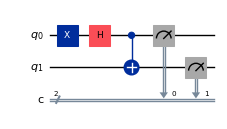

In [ ]:
# Criando o circuito quântico
bell_circuit = QuantumCircuit(q, c)

# Inicializando o primeiro qubit no estado |1>
bell_circuit.x(q[0])

# Aplicando Hadamard no primeiro qubit
bell_circuit.h(q[0])
# Aplicando CNOT com o primeiro qubit como controle e o segundo como alvo
bell_circuit.cx(q[0], q[1])

# Medindo os qubits
bell_circuit.measure(q, c)

# Configurando o simulador
simulator = AerSimulator()

# Exibir o circuito
bell_circuit.draw(output='mpl', scale=0.5)

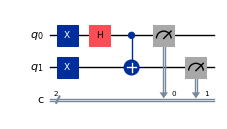

In [ ]:
# Criando o circuito quântico
bell_circuit = QuantumCircuit(q, c)

# Inicializando ambos os qubits no estado |1>
bell_circuit.x(q[0])
bell_circuit.x(q[1])

# Aplicando Hadamard no primeiro qubit
bell_circuit.h(q[0])
# Aplicando CNOT com o primeiro qubit como controle e o segundo como alvo
bell_circuit.cx(q[0], q[1])

# Medindo os qubits
bell_circuit.measure(q, c)

# Configurando o simulador
simulator = AerSimulator()

# Exibir o circuito
bell_circuit.draw(output='mpl', scale=0.5)

In [ ]:
!pip install qiskit-aer


In [ ]:
from qiskit import*
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import XGate, ZGate

# Etapa 1: Circuito até as medições da Alice
qreg = QuantumRegister(3, 'q')
creg = ClassicalRegister(2, 'c')  # Só precisamos medir q[0] e q[1] agora

qc1 = QuantumCircuit(qreg, creg)

# Estado de Bell
qc1.h(qreg[1])
qc1.cx(qreg[1], qreg[2])

# Estado a ser teleportado (|+>)
qc1.h(qreg[0])

# Medidas de Alice
qc1.cx(qreg[0], qreg[1])
qc1.h(qreg[0])
qc1.measure(qreg[0], creg[0])  # c0
qc1.measure(qreg[1], creg[1])  # c1

# Executar primeira parte
sim = Aer.get_backend('aer_simulator')
qc1 = qc1.copy()
qc1.save_statevector()
result1 = execute(qc1, sim, shots=1, memory=True).result()
memory = result1.get_memory()
bit_c0 = int(memory[0][1])  # c0
bit_c1 = int(memory[0][0])  # c1

print(f'Medições de Alice: c0 = {bit_c0}, c1 = {bit_c1}')

# Etapa 2: Correções de Bob
qreg2 = QuantumRegister(1, 'q2')
creg2 = ClassicalRegister(1, 'c2')
qc2 = QuantumCircuit(qreg2, creg2)

# Recuperar o qubit de Bob
# Inicializa no estado apropriado (assumido como resultado do teletransporte)
# Para simulação, vamos usar o mesmo estado |q2⟩ do circuito anterior
# Mas aqui só simulamos a aplicação condicional

# Aplicar correções conforme resultados de Alice
if bit_c0 == 1:
    qc2.z(qreg2[0])
if bit_c1 == 1:
    qc2.x(qreg2[0])

# Medir o qubit de Bob
qc2.measure(qreg2[0], creg2[0])

# Resultado final
result2 = execute(qc2, sim, shots=1024).result()
counts = result2.get_counts()

# Mostrar resultado
print("Resultado da medição final do qubit de Bob:")
display(plot_histogram(counts))



NameError: name 'execute' is not defined

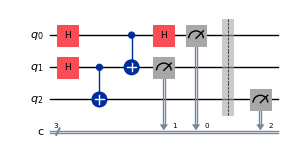

In [ ]:
# Importações (Qiskit 2.x)
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Circuito com 3 qubits e 3 bits clássicos
qc = QuantumCircuit(3, 3)

# Estado inicial de Alice (qubit 0): |+>
qc.h(0)

# Emaranhar qubit 1 (Alice) e qubit 2 (Bob)
qc.h(1)
qc.cx(1, 2)

# Bell measurement de Alice
qc.cx(0, 1)
qc.h(0)

# Medições de Alice
qc.measure(0, 0)
qc.measure(1, 1)

# Correções em Bob (serão aplicadas depois no código, não no circuito)
qc.barrier()
qc.measure(2, 2)

# Executar no Aer simulator (novo formato Qiskit 2.0)
backend = Aer.get_backend('aer_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()

# Mostrar histograma dos resultados
plot_histogram(counts)
plt.show()
qc.draw(output='mpl', scale=0.5)


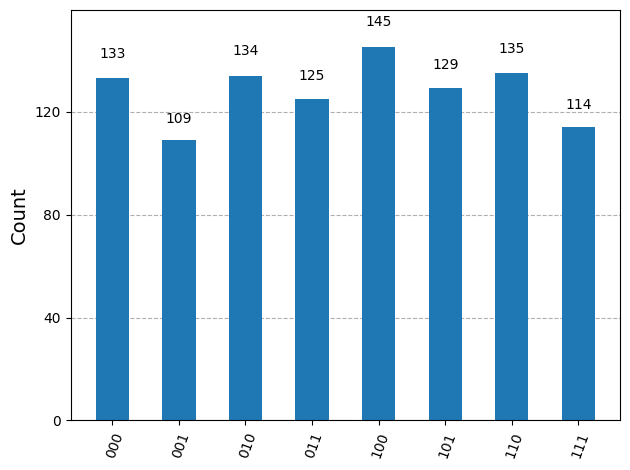

In [ ]:
plot_histogram(counts)


In [ ]:
# Instalar Qiskit se ainda não estiver
!pip install qiskit qiskit-aer --quiet




In [ ]:
!pip install qiskit-aer --upgrade --quiet


In [ ]:
from qiskit_aer import Aer


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Criando registros quânticos e clássicos
q = QuantumRegister(3, 'q')  # 3 qubits
c0 = ClassicalRegister(1, 'c0')  # Registradores clássicos para armazenar medições
c1 = ClassicalRegister(1, 'c1')
c2 = ClassicalRegister(1, 'c2')

# Criando o circuito quântico
teleport = QuantumCircuit(q, c0, c1, c2)

# Criar o estado emaranhado compartilhado (Bell state)
teleport.h(q[1])          # Aplicando porta Hadamard ao qubit 1
teleport.cx(q[1], q[2])   # Aplicando CNOT com q[1] como controle e q[2] como alvo

# Preparar o qubit da Alice
teleport.h(q[0])          # Aplicando porta Hadamard ao qubit 0

# Alice aplica as portas de teletransporte (projetando na base de Bell)
teleport.cx(q[0], q[1])   # Aplicando CNOT com q[0] como controle e q[1] como alvo
teleport.h(q[0])          # Aplicando porta Hadamard ao qubit 0

# Alice mede seus qubits
teleport.measure(q[0], c0)  # Medindo q[0] e armazenando o resultado em c0
teleport.measure(q[1], c1)  # Medindo q[1] e armazenando o resultado em c1

# Bob aplica as operações baseadas nas medições de Alice
# Bob aplica a operação X se c1 for 1
teleport.x(q[2]).c_if(c1, 1)

# Bob aplica a operação Z se c0 for 1
teleport.z(q[2]).c_if(c0, 1)

# Medir o estado final do qubit de Bob
teleport.measure(q[2], c2)  # Medindo q[2] e armazenando o resultado em c2

# Configurando o simulador
simulator = AerSimulator()

# Transpilando o circuito para o simulador
teleport = transpile(teleport, simulator)

# Executar o circuito no simulador
result = simulator.run(teleport).result()

# Exibir os resultados
counts = result.get_counts()
plot_histogram(counts)
plt.show()

# Exibir o circuito usando Matplotlib
teleport.draw(output='mpl', scale=0.5)


AttributeError: 'InstructionSet' object has no attribute 'c_if'

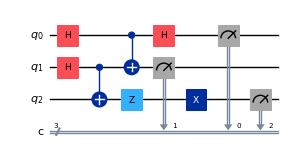

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Circuito para teleportar o estado |+> de q0 para q2
def create_teleportation_circuit(meas_result):
    qc = QuantumCircuit(3, 3)

    # Criar estado de Bell entre q1 e q2
    qc.h(1)
    qc.cx(1, 2)

    # Preparar estado a ser teleportado: |+> = H|0>
    qc.h(0)

    # Alice aplica portas para teletransporte
    qc.cx(0, 1)
    qc.h(0)

    # Medições de Alice
    qc.measure(0, 0)
    qc.measure(1, 1)

    # Correções de Bob baseadas no resultado
    if meas_result == '00':
        pass  # nenhuma correção
    elif meas_result == '01':
        qc.x(2)
    elif meas_result == '10':
        qc.z(2)
    elif meas_result == '11':
        qc.z(2)
        qc.x(2)

    # Medir o qubit de Bob
    qc.measure(2, 2)
    return qc

# Simulador
simulator = AerSimulator()

# Dicionário para armazenar os resultados
results = {}

# Executar para cada resultado possível de Alice
for meas_result in ['00', '01', '10', '11']:
    qc = create_teleportation_circuit(meas_result)
    compiled = transpile(qc, simulator)
    job = simulator.run(compiled, shots=3000, memory=False)
    result = job.result()
    counts = result.get_counts()
    results[meas_result] = counts


qc.draw(output='mpl', scale=0.5)

Resultado simulado da medição de Alice: 00
Correções aplicadas por Bob: Nenhuma
Bob mediu o qubit final como: |1⟩

Circuito:


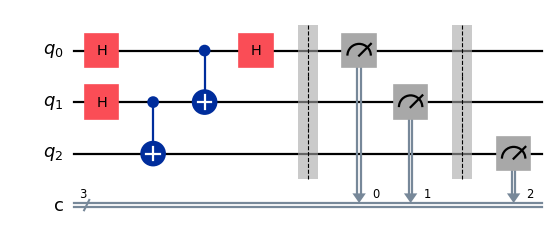

Resultado simulado da medição de Alice: 01
Correções aplicadas por Bob: X
Bob mediu o qubit final como: |0⟩

Circuito:


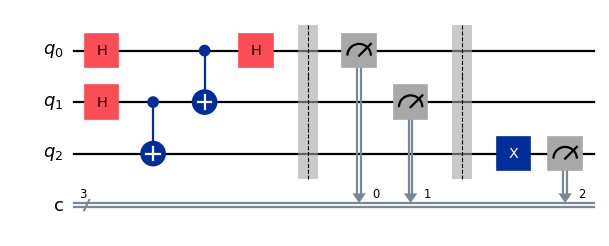

Resultado simulado da medição de Alice: 10
Correções aplicadas por Bob: Z
Bob mediu o qubit final como: |0⟩

Circuito:


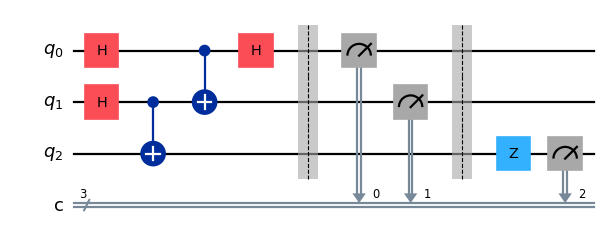

Resultado simulado da medição de Alice: 11
Correções aplicadas por Bob: Z e X
Bob mediu o qubit final como: |1⟩

Circuito:


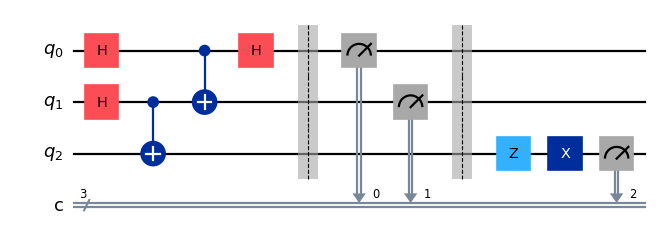

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Mapeamento de correções baseado no resultado da medição de Alice
corrections = {
    '00': [],
    '01': ['X'],
    '10': ['Z'],
    '11': ['Z', 'X']
}

# Simulador
simulator = AerSimulator()

# Loop sobre os 4 possíveis resultados da medição de Alice
for meas_result in ['00', '01', '10', '11']:
    # Criar circuito
    qc = QuantumCircuit(3, 3)

    # Criar par de Bell entre q1 e q2
    qc.h(1)
    qc.cx(1, 2)

    # Preparar o estado de entrada: |+⟩ = H|0⟩
    qc.h(0)

    # Teletransporte: Alice
    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()

    # Medições de Alice
    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.barrier()

    # Correções de Bob baseadas em meas_result
    if meas_result == '01':
        qc.x(2)
    elif meas_result == '10':
        qc.z(2)
    elif meas_result == '11':
        qc.z(2)
        qc.x(2)

    # Medição final de Bob
    qc.measure(2, 2)

    # Transpilar e simular
    compiled = transpile(qc, simulator)
    job = simulator.run(compiled, shots=1, memory=True)  # apenas 1 shot para simplificar
    result = job.result()
    memory = result.get_memory()[0]  # resultado no formato 'c2c1c0'

    # Quebrar resultado em bits
    bob_meas = memory[0]  # c2
    alice_meas = memory[2] + memory[1]  # c0c1 (como string, mesma ordem usada em nosso loop)

    # Exibir informações
    print("="*40)
    print(f"Resultado simulado da medição de Alice: {meas_result}")
    print("Correções aplicadas por Bob:", 'Nenhuma' if not corrections[meas_result] else ' e '.join(corrections[meas_result]))
    print(f"Bob mediu o qubit final como: |{bob_meas}⟩")
    print("\nCircuito:")
    display(qc.draw('mpl', scale=0.8))
